# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?q="
appid = "&appid="
city_df = []

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# loop thru (cities) and print each name/id
counter = 1

country= []
cityn = []
lats = []
lngs = []
temps = []
max_temps = []
humidities = []
clouds = []
winds = []

for cityname in cities:
    if counter < 500:
        try:
            query_url = url + cityname + appid + weather_api_key
            city_request = requests.get(query_url).json()
            city_name = city_request['name']
            city_lat = city_request['coord']['lat']
            city_long = city_request['coord']['lon']
            city_temp = city_request['main']['temp']
            city_max = city_request['main']['temp_max']
            city_hum = city_request['main']['humidity']
            city_cloud = city_request['clouds']['all']
            city_wind = city_request['wind']['speed']
            # get country info
            country_info = city_request['sys']['country']
            # append city name
            cityn.append(city_name)
            # append country info
            country.append(country_info)
            lats.append(city_lat)
            lngs.append(city_long)
            temps.append(city_temp)
            max_temps.append(city_max)
            humidities.append(city_hum)
            clouds.append(city_cloud)
            winds.append(city_wind)
            print("city name is " + str(city_name) + " and the position is: " + str(counter))
            counter = counter + 1
        except:
            break

city name is Mahébourg and the position is: 1
city name is Punta Arenas and the position is: 2


In [23]:
lats

[-20.4081, -53.15]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# api call template: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#sample call for city yellowknife



city_df = []

        

city_df = {
    'country' : country,
           'cityn' : cityn,
    'lats' : lats,
    'lngs' : lngs,
    "temps" : temps,
    'max_temps' : max_temps,
    'humidities' : humidities,
    'clouds' : clouds,
    'winds' : winds
               
} 






## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#convet to df
cities_df = pd.DataFrame(city_df)

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:


#export to csv 
cities_df.to_csv("../output_data/cities.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Analysis


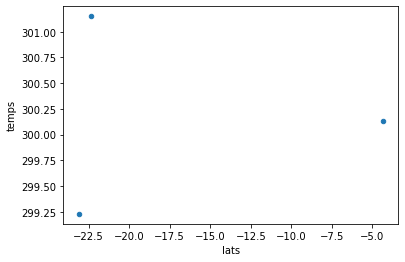

In [15]:
#cities_df["latn"] = np.where(cities_df.lats > 0, cities_df.lats, 0)
#cities_df["latso"] = np.where(cities_df.lats < 0, - cities_df.lats, 0) 


cities_df.plot.scatter(x='lats', y='temps' )
plt.savefig('Lat vs Temp.png')
print ('Analysis: there is a strong relationship between temp increasing and closer to equator ')

## Latitude vs. Humidity Plot

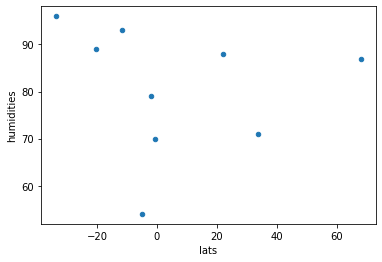

In [11]:
cities_df.plot.scatter(x='lats', y='humidities' )
#AxesSubplot:xlabel='Latitude', ylabel='Humidity'
plt.savefig('Lat vs Humidity.png')
print ('Analysis: there is a relationship between humitiy and latitude closer to equator')

## Latitude vs. Cloudiness Plot

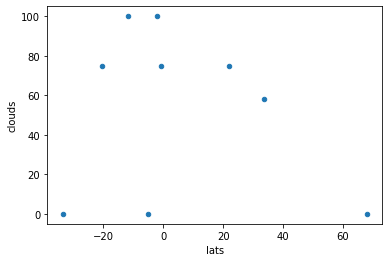

In [12]:
cities_df.plot.scatter(x='lats', y='clouds' )
#AxesSubplot:xlabel='Latitude', ylabel='Cloudiness'
plt.savefig('Lat vs Cloudiness.png')
print ('Analysis:There is not much of a relationship between latitude and Cloudiness ')

## Latitude vs. Wind Speed Plot

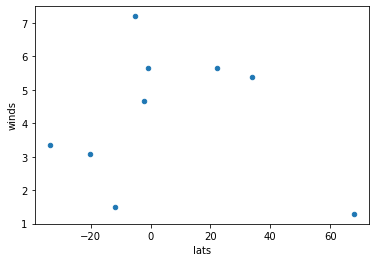

In [13]:
cities_df.plot.scatter(x='lats', y='winds' )
#AxesSubplot:xlabel='Latitude', ylabel='Wind Speed'
plt.savefig('Lat vs Wind Speed.png')
print ('Analysis: There is not much of a relationship between latitude and wind speed')

## Linear Regression

In [15]:
#split northern and southern lats

north_df = cities_df
south_df = cities_df

north_df = north_df[north_df.lats > 0]
south_df = north_df[north_df.lats > 0]




,country,cityn,lats,lngs,temps,max_temps,humidities,clouds,winds
1,JP,Shingū,33.7333,135.9833,277.79,277.79,71,58,5.38
2,US,Kapaa,22.0752,-159.3190,297.92,299.26,88,75,5.66
8,RU,Lovozero,68.0050,35.0117,252.04,252.04,87,0,1.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the correlation coefficient is -0.9748675034248176


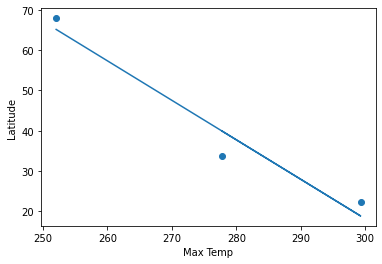

In [16]:
x_value = north_df['max_temps']
y_value = north_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()
print ('Analysis: there is an a negative correlation between latitude and temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the correlation coefficient is -0.8202151922543476


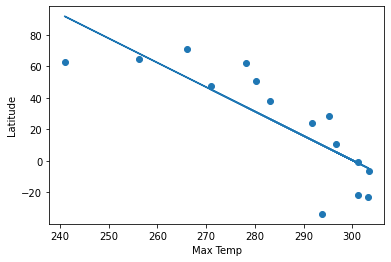

In [17]:
x_value = south_df['max_temps']
y_value = south_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()
print ('Analysis: there is an a negative correlation between latitude and temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the correlation coefficient is 0.1476960448944462


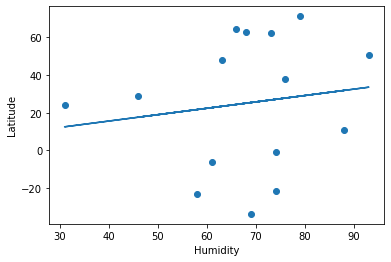

In [18]:
x_value = north_df['humidities']
y_value = north_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()
print ('Analysis: there is an a weak positive correlation between latitude and humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the correlation coefficient is 0.1476960448944462


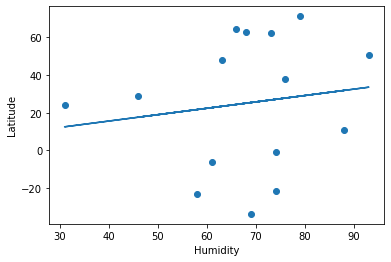

In [19]:
x_value = south_df['humidities']
y_value = south_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()
print ('Analysis: there is an a weak positive correlation between latitude and humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the correlation coefficient is 0.14960914643733955


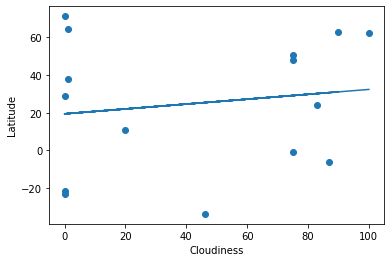

In [20]:
x_value = north_df['clouds']
y_value = north_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()
print ('Analysis: there is an a weak positive correlation between latitude and cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the correlation coefficient is 0.14960914643733955


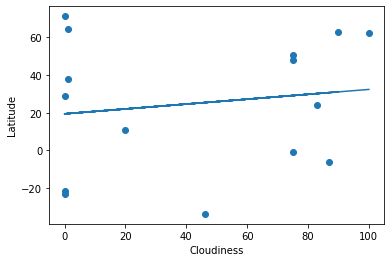

In [21]:
x_value = south_df['clouds']
y_value = south_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()
print ('Analysis: there is an a weak positive correlation between latitude and cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the correlation coefficient is 0.34966148036162664


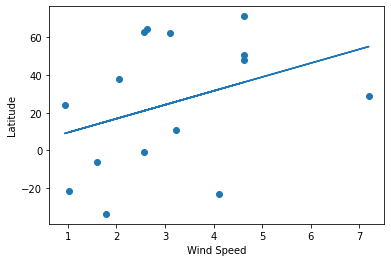

In [22]:
x_value = north_df['winds']
y_value = north_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()
print ('Analysis: there is an a weak positive correlation between latitude and wind speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the correlation coefficient is 0.34966148036162664


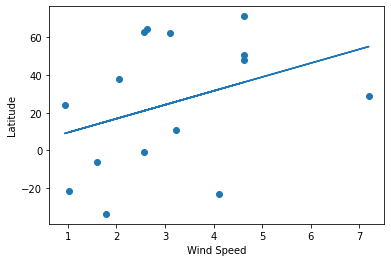

In [23]:
x_value = south_df['winds']
y_value = south_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()
print ('Analysis: there is an a weak positive correlation between latitude and wind speed')